In [1]:
import pandas as pd
import numpy as np
from scipy import stats

print("this is new!")

### get tab 2 - this is the tab that contains the query set
geo_data_cell_2 = pd.read_excel('GEO2.xlsx', sheet_name=1)
### empty array to store the gene names from tab 2
### this is the data that defines the query set
query_names = []

### get tab 1 - this is the tab that contains the data associated
### with the query set + many more genes... trick is we need
### to pick-out only the elements of this data set that correspond
### to the query set
geo_data_cell_1 = pd.read_excel('GEO2.xlsx', sheet_name=0) 

### empty array to store the indices of the genes in the
### data set that are also in the query set
query_indices = []


# loop through all elements of the query set
for i in range(0,len(geo_data_cell_2)):
    # get the gene name
    gene_label = geo_data_cell_2.iloc[i,0]
    # determine of the second character of the gene name is a 
    # 2; if it is, we will stop reading there!
    #if int(gene_label[1])==2:
    #    divider_t2 = i-1
    #    break
    # store the C1 gene names to the query_names array
    query_names.append(str(gene_label))
    

### nested for-loop to find matches between the query set and data set IF they
### are there!
for i in range(0,len(query_names)):
    qn = query_names[i]
    for j in range(0, len(geo_data_cell_1)):
        gene_label = str(geo_data_cell_1.iloc[j,0])
        divider_t1= len(geo_data_cell_1)
        if qn == gene_label:
            query_indices.append(j)
            print("query index is",i, "data index is ",j, "qn is ",qn, "gene label is ",gene_label)
        



this is new!
query index is 0 data index is  3 qn is  C1_00040W_A gene label is  C1_00040W_A
query index is 1 data index is  5 qn is  C1_00060W_A gene label is  C1_00060W_A
query index is 2 data index is  13 qn is  C1_00140W_A gene label is  C1_00140W_A
query index is 3 data index is  14 qn is  C1_00150C_A gene label is  C1_00150C_A
query index is 4 data index is  21 qn is  C1_00220W_A gene label is  C1_00220W_A
query index is 5 data index is  22 qn is  C1_00230C_A gene label is  C1_00230C_A
query index is 6 data index is  28 qn is  C1_00330C_A gene label is  C1_00330C_A
query index is 7 data index is  29 qn is  C1_00340W_A gene label is  C1_00340W_A
query index is 8 data index is  30 qn is  C1_00350C_A gene label is  C1_00350C_A
query index is 9 data index is  37 qn is  C1_00430W_A gene label is  C1_00430W_A
query index is 10 data index is  38 qn is  C1_00440W_A gene label is  C1_00440W_A
query index is 11 data index is  39 qn is  C1_00450C_A gene label is  C1_00450C_A
query index is 

In [2]:
### Let's go through the query indices list and then
### find it's -/+ 5 neighbors if available!
for i in range(0,len(query_indices)):
    print("")
    # store the target index to the variablt tidx for
    # slighly simpler code
    tidx = query_indices[i]
    # get the name of the gene
    target_gene_label = geo_data_cell_1.iloc[tidx,0]
    # empty array for storing additional data 
    target_gene_exp = []
    for k in range(2,7):
        target_gene_exp.append(float(geo_data_cell_1.iloc[tidx,k]))

    
    # we have a few options now depending on where we 
    # are in the list...
    if tidx==0:
        min_nn = 1
        max_nn = tidx+6
    elif tidx<6:
        ### for the first element in the list, there are no - pairs
        min_nn = 0
        max_nn = tidx+6
    elif tidx>divider_t1-5:
        min_nn = tidx-5
        max_nn = divider_t1
    else:
        min_nn = tidx-5
        max_nn = tidx+6
    for j in range(min_nn, max_nn):
        if tidx!=j:
            neighbor_gene_label = geo_data_cell_1.iloc[j,0]
            neighbor_gene_exp = []
            if target_gene_label[1] ==  neighbor_gene_label[1]:
                for k in range(2,7):
                    neighbor_gene_exp.append(float(geo_data_cell_1.iloc[j,k]))
                scc,pval = stats.spearmanr(target_gene_exp, neighbor_gene_exp, nan_policy='omit')
            print(target_gene_label, neighbor_gene_label, scc)
            #comp_vals = geo_data_cell_1.iloc[j,2]


C1_00040W_A C1_00010W_A -0.5
C1_00040W_A C1_00020C_A 0.6
C1_00040W_A C1_00030C_A 0.9746794344808964
C1_00040W_A C1_00050C_A -0.6668859288553501
C1_00040W_A C1_00060W_A -0.9746794344808964
C1_00040W_A C1_00070W_A -0.051298917604257706
C1_00040W_A C1_00080C_A 0.35909242322980395
C1_00040W_A C1_00090W_A -0.15389675281277312

C1_00060W_A C1_00010W_A 0.8660254037844387
C1_00060W_A C1_00020C_A -0.6668859288553503
C1_00060W_A C1_00030C_A -1.0
C1_00060W_A C1_00040W_A -0.9746794344808963
C1_00060W_A C1_00050C_A 0.6842105263157895
C1_00060W_A C1_00070W_A 0.052631578947368425
C1_00060W_A C1_00080C_A -0.36842105263157904
C1_00060W_A C1_00090W_A 0.15789473684210528
C1_00060W_A C1_00100C_A 0.052631578947368425
C1_00060W_A C1_00110W_A 0.052631578947368425

C1_00140W_A C1_00090W_A 0.15789473684210528
C1_00140W_A C1_00100C_A 0.052631578947368425
C1_00140W_A C1_00110W_A 0.052631578947368425
C1_00140W_A C1_00120C_A 0.15789473684210528
C1_00140W_A C1_00130C_A -0.36842105263157904
C1_00140W_A C1_00150C_A 

In [5]:
### Let's go through the query indices list and then
### find it's -/+ 5 neighbors if available!
for i in range(0,len(query_indices)):
    print("")
    # store the target index to the variablt tidx for
    # slighly simpler code
    tidx = query_indices[i]
    # get the name of the gene
    target_gene_label = geo_data_cell_1.iloc[tidx,1]
    # empty array for storing additional data 
    target_gene_exp = []

    target_gene_exp.append(float(geo_data_cell_1.iloc[tidx,1]))

    
    # we have a few options now depending on where we 
    # are in the list...
    if tidx==0:
        min_nn = 1
        max_nn = tidx+6
    elif tidx<6:
        ### for the first element in the list, there are no - pairs
        min_nn = 0
        max_nn = tidx+6
    elif tidx>divider_t1-5:
        min_nn = tidx-5
        max_nn = divider_t1
    else:
        min_nn = tidx-5
        max_nn = tidx+6
    for j in range(min_nn, max_nn):
        if tidx!=j:
            neighbor_gene_label = geo_data_cell_1.iloc[j,1]
            neighbor_gene_exp = []
            neighbor_gene_exp.append(float(geo_data_cell_1.iloc[j,1]))
            print (target_gene_label - neighbor_gene_label)
            #comp_vals = geo_data_cell_1.iloc[j,2]


6659.0
5998.0
1810.0
-1277.0
-1445.0
-3060.0
-5043.0
-4877.0

8104.0
7443.0
3255.0
1445.0
168.0
-1615.0
-3598.0
-3432.0
-5165.0
-5175.0

6675.0
4942.0
4932.0
2642.0
556.0
-4979.0
-7218.0
-7534.0
-9572.0
-11048.0

9921.0
9911.0
7621.0
5535.0
4979.0
-2239.0
-2555.0
-4593.0
-6069.0
-7197.0

8047.0
6009.0
4533.0
3405.0
2172.0
-3919.0
-4754.0
-5828.0
-5952.0
-8952.0

9928.0
8452.0
7324.0
6091.0
3919.0
-835.0
-1909.0
-2033.0
-5033.0
-6743.0

7238.0
6164.0
6040.0
3040.0
1330.0
-154.0
-1838.0
-3256.0
-7231.0
-9506.0

6318.0
6194.0
3194.0
1484.0
154.0
-1684.0
-3102.0
-7077.0
-9352.0
-13205.0

7878.0
4878.0
3168.0
1838.0
1684.0
-1418.0
-5393.0
-7668.0
-11521.0
-14643.0

12152.0
9877.0
6024.0
2902.0
1383.0
-1842.0
-4057.0
-4354.0
-6155.0
-8602.0

11719.0
7866.0
4744.0
3225.0
1842.0
-2215.0
-2512.0
-4313.0
-6760.0
-7299.0

10081.0
6959.0
5440.0
4057.0
2215.0
-297.0
-2098.0
-4545.0
-5084.0
-6386.0

7256.0
5737.0
4354.0
2512.0
297.0
-1801.0
-4248.0
-4787.0
-6089.0
-6544.0

8602.0
6760.0
4545.0
4248

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 


In [2]:
import pandas as pd
import numpy as np
from scipy import stats

print("this is new!")

### get tab 2 - this is the tab that contains the query set
geo_data_cell_2 = pd.read_excel('GEO2.xlsx', sheet_name=1)
### empty array to store the gene names from tab 2
### this is the data that defines the query set
query_names = []

### get tab 1 - this is the tab that contains the data associated
### with the query set + many more genes... trick is we need
### to pick-out only the elements of this data set that correspond
### to the query set
geo_data_cell_1 = pd.read_excel('GEO2.xlsx', sheet_name=0) 

### empty array to store the indices of the genes in the
### data set that are also in the query set
query_indices = []


# loop through all elements of the query set
for i in range(0,len(geo_data_cell_2)):
    # get the gene name
    gene_label = geo_data_cell_2.iloc[i,0]
    # determine of the second character of the gene name is a 
    # 2; if it is, we will stop reading there!
    #if int(gene_label[1])==2:
    #    divider_t2 = i-1
    #    break
    # store the C1 gene names to the query_names array
    query_names.append(str(gene_label))
    

### nested for-loop to find matches between the query set and data set IF they
### are there!
for i in range(0,len(query_names)):
    qn = query_names[i]
    for j in range(0, len(geo_data_cell_1)):
        gene_label = str(geo_data_cell_1.iloc[j,0])
        divider_t1= len(geo_data_cell_1)
        if qn == gene_label:
            query_indices.append(j)
            
        



this is new!


In [3]:
### Let's go through the query indices list and then
### find it's -/+ 5 neighbors if available!
for i in range(0,len(query_indices)):
    print("")
    # store the target index to the variablt tidx for
    # slighly simpler code
    tidx = query_indices[i]
    # get the name of the gene
    target_gene_label = geo_data_cell_1.iloc[tidx,0]
    # empty array for storing additional data 
    target_gene_exp = []
    for k in range(2,7):
        target_gene_exp.append(float(geo_data_cell_1.iloc[tidx,k]))

    
    # we have a few options now depending on where we 
    # are in the list...
    if tidx==0:
        min_nn = 1
        max_nn = tidx+6
    elif tidx<6:
        ### for the first element in the list, there are no - pairs
        min_nn = 0
        max_nn = tidx+6
    elif tidx>divider_t1-5:
        min_nn = tidx-5
        max_nn = divider_t1
    else:
        min_nn = tidx-5
        max_nn = tidx+6
    for j in range(min_nn, max_nn):
        if tidx!=j:
            neighbor_gene_label = geo_data_cell_1.iloc[j,0]
            neighbor_gene_exp = []
            if target_gene_label[1] ==  neighbor_gene_label[1]:
                for k in range(2,7):
                    neighbor_gene_exp.append(float(geo_data_cell_1.iloc[j,k]))
                scc,pval = stats.spearmanr(target_gene_exp, neighbor_gene_exp, nan_policy='omit')
            print(scc)
            #comp_vals = geo_data_cell_1.iloc[j,2]


-0.5
0.6
0.9746794344808964
-0.6668859288553501
-0.9746794344808964
-0.051298917604257706
0.35909242322980395
-0.15389675281277312

0.8660254037844387
-0.6668859288553503
-1.0
-0.9746794344808963
0.6842105263157895
0.052631578947368425
-0.36842105263157904
0.15789473684210528
0.052631578947368425
0.052631578947368425

0.15789473684210528
0.052631578947368425
0.052631578947368425
0.15789473684210528
-0.36842105263157904
-0.052631578947368425
0.052631578947368425
-1.0
0.052631578947368425
-0.15789473684210528

-1.0
-1.0
-0.8947368421052632
0.6842105263157895
-0.052631578947368425
-1.0
0.052631578947368425
-1.0
0.8947368421052632
-0.052631578947368425

-0.36842105263157904
0.6842105263157895
-0.36842105263157904
0.36842105263157904
0.6842105263157895
-0.052631578947368425
-0.15389675281277312
0.6842105263157895
0.15389675281277312
0.6842105263157895

-0.36842105263157904
0.6842105263157895
-0.6842105263157895
-0.36842105263157904
-0.052631578947368425
-0.15389675281277312
-0.368421052631

0.05129891760425771
0.05129891760425771
0.052631578947368425
-0.35909242322980395
1.0
0.5789473684210528
0.6842105263157895
0.6842105263157895
0.6842105263157895

0.05129891760425771
0.05129891760425771
0.052631578947368425
-0.35909242322980395
1.0
0.5789473684210528
0.6842105263157895
0.6842105263157895
0.6842105263157895
-0.8207826816681234

-0.8720815992723809
-0.9746794344808964
-0.15389675281277312
-0.15389675281277312
0.7
0.8999999999999998
0.7
0.7999999999999999
0.8999999999999998
0.7

-0.8720815992723809
0.15389675281277312
0.15389675281277312
0.6
0.8999999999999998
0.6
0.8999999999999998
0.9999999999999999
0.6
0.6

0.35909242322980395
0.35909242322980395
0.19999999999999998
0.7
0.6
0.49999999999999994
0.6
0.9999999999999999
0.9999999999999999
0.49999999999999994

-0.09999999999999999
-0.19999999999999998
-0.39999999999999997
-0.39999999999999997
-0.09999999999999999
0.39999999999999997
-0.7
-0.3
0.6
-0.6668859288553501

0.6
-0.19999999999999998
-0.19999999999999998
0.7
0.39999

0.9999999999999999
-0.35909242322980395
0.8720815992723809

0.8999999999999998
0.9999999999999999
0.9999999999999999
0.7
0.6
-0.35909242322980395
0.8720815992723809
0.49999999999999994
0.7999999999999999
0.49999999999999994

0.8720815992723809
0.5642880936468347
0.5642880936468347
0.8720815992723809
-0.6842105263157895
0.8207826816681234
0.9746794344808963
0.6668859288553503
0.5642880936468347
0.9746794344808963

0.6
0.7999999999999999
-0.6668859288553501
0.9746794344808964
0.8999999999999998
0.7
0.6
0.9999999999999999
-0.15389675281277312
0.6

0.49999999999999994
-0.15389675281277312
0.6668859288553501
0.49999999999999994
0.7
0.8999999999999998
0.7
0.5642880936468347
0.8999999999999998
0.6

0.5642880936468347
0.7999999999999999
0.49999999999999994
0.6
0.6
0.6
0.7999999999999999
-0.5642880936468347
0.6668859288553501
0.7999999999999999

0.6
0.8999999999999998
0.7999999999999999
0.7999999999999999
0.6
0.6
-0.9746794344808964
-0.15389675281277312
0.6
0.5

-0.6668859288553501
0.9999999999

0.5642880936468347
0.9999999999999999
0.7

0.8207826816681233
-0.3
0.6155870112510925
-0.49999999999999994
0.09999999999999999
0.09999999999999999
-0.20519567041703082
0.09999999999999999
-0.49999999999999994
0.8207826816681233

0.7
0.9999999999999999
0.09999999999999999
0.9999999999999999
0.5642880936468347
0.7
-0.15389675281277312
0.8999999999999998
0.15389675281277312
0.6668859288553501

0.7
-0.49999999999999994
0.7
0.8720815992723809
0.7
-0.6668859288553501
0.6
0.6668859288553501
0.9746794344808964
-0.15389675281277312

0.6
0.6
0.49999999999999994
0.7
1.0
0.15389675281277312
0.8999999999999998
0.8999999999999998
0.19999999999999998
0.8999999999999998

0.6668859288553503
0.35909242322980395
0.6668859288553503
0.8660254037844387
0.15389675281277312
0.15389675281277312
-0.15389675281277312
0.6668859288553503
0.15389675281277312
0.6668859288553503

-0.3
0.35909242322980395
-0.09999999999999999
0.35909242322980395
-0.15389675281277312
0.49999999999999994
-0.09999999999999999
0.0
0.0
0.9

0.5642880936468347
-0.052631578947368425
-0.8947368421052632
0.052631578947368425
0.6668859288553503
0.9746794344808963
-0.05129891760425771
0.9746794344808963
0.6668859288553503

0.49999999999999994
0.49999999999999994
0.6
0.0
0.6
0.9999999999999999
0.8999999999999998
-0.19999999999999998
0.9999999999999999
0.6

0.49999999999999994
0.6
0.0
0.6
0.9999999999999999
0.8999999999999998
-0.19999999999999998
0.9999999999999999
0.6
-0.8999999999999998

0.7
-0.09999999999999999
0.7
0.8999999999999998
0.8999999999999998
-0.09999999999999999
0.8999999999999998
0.7
-0.7
0.49999999999999994

0.7999999999999999
0.6
-0.19999999999999998
-0.19999999999999998
-0.09999999999999999
-0.19999999999999998
0.6
0.49999999999999994
0.6
-0.09999999999999999

0.7999999999999999
-0.3
0.9999999999999999
0.49999999999999994
0.7999999999999999
-0.5642880936468347
0.49999999999999994
0.7999999999999999
0.9999999999999999
-0.09999999999999999

-0.4103913408340617
-0.5642880936468347
0.05129891760425771
-0.66688592885

0.8720815992723809
-0.6
0.6668859288553501
0.7
-0.19999999999999998

0.09999999999999999
0.09999999999999999
-0.19999999999999998
0.3
0.7
-0.09999999999999999
-0.6668859288553501
0.35909242322980395
0.3
0.3

-0.5642880936468347
-0.8720815992723809
-0.9746794344808963
-0.6668859288553503
-0.5642880936468347
-0.8947368421052632
-0.8720815992723809
-0.8720815992723809
-0.8720815992723809
-0.8720815992723809

0.9746794344808963
0.8720815992723809
0.35909242322980395
0.6668859288553503
-0.8947368421052632
0.9746794344808963
0.9746794344808963
0.9746794344808963
0.9746794344808963
0.9746794344808963

0.7
0.6
0.7
0.6
0.6
0.8999999999999998
0.6
0.8999999999999998
0.8999999999999998
0.8999999999999998

0.49999999999999994
0.6
0.49999999999999994
0.49999999999999994
0.8999999999999998
0.7
0.9999999999999999
0.9999999999999999
0.7999999999999999
-0.6668859288553501

0.8999999999999998
0.7999999999999999
-0.19999999999999998
0.6
0.7
0.7
0.7
0.49999999999999994
-0.9746794344808964
-0.99999999999999

0.8999999999999998
0.8999999999999998
-0.6668859288553501

-0.6842105263157895
-0.30779350562554625
0.6842105263157895
-0.8947368421052632
-0.36842105263157904
0.05129891760425771
0.052631578947368425
0.15389675281277312
-0.9746794344808963
-0.9746794344808963

0.7
0.35909242322980395
-0.15389675281277312
-0.6668859288553501
0.051298917604257706
0.9746794344808964
0.8999999999999998
-0.09999999999999999
-0.09999999999999999
0.051298917604257706

-0.9746794344808963
1.0
1.0
-0.8720815992723809
-0.9746794344808963
-0.9746794344808963
-0.052631578947368425
0.6842105263157895
-0.9746794344808963
-0.9746794344808963

-0.9746794344808964
-0.9746794344808964
0.8999999999999998
0.9999999999999999
-0.9746794344808964
0.051298917604257706
-0.6668859288553501
0.9999999999999999
0.9999999999999999
0.7999999999999999

-0.052631578947368425
0.15389675281277312
0.05129891760425771
-0.052631578947368425
0.05129891760425771
-0.36842105263157904
0.05129891760425771
0.05129891760425771
0.1538967528127731

0.35909242322980395
0.3
0.7
0.8999999999999998
0.0
0.7

0.20519567041703082
-0.49999999999999994
0.09999999999999999
0.8207826816681233
0.3
-0.3
0.09999999999999999
-0.7
-0.3
-0.6155870112510925

0.6
0.6
-0.15389675281277312
0.7
-0.3
0.6
0.7
0.9999999999999999
0.5642880936468347
-0.6668859288553501

-0.8720815992723809
0.8999999999999998
0.8720815992723809
0.6
0.9746794344808964
-0.6668859288553501
0.8999999999999998
-0.8720815992723809
0.8999999999999998
0.9999999999999999

-0.35909242322980395
-0.36842105263157904
-0.15389675281277312
-0.6842105263157895
-0.6668859288553503
-0.6668859288553503
0.36842105263157904
-0.35909242322980395
-0.6668859288553503
-0.15389675281277312

0.7
0.6
0.7
0.49999999999999994
0.6
0.8999999999999998
0.6
0.7999999999999999
0.49999999999999994
0.8999999999999998

0.49999999999999994
0.6
0.6
0.7
0.8999999999999998
0.7
0.8999999999999998
0.6
0.7999999999999999
0.6

0.09999999999999999
0.39999999999999997
0.19999999999999998
0.6
0.7
0.8999999999999998
0.39999

-0.09999999999999999

-0.8720815992723809
-0.6668859288553501
0.8999999999999998
0.6
0.9999999999999999
0.8999999999999998
0.8999999999999998
0.8999999999999998
-0.09999999999999999
0.051298917604257706

0.7999999999999999
0.49999999999999994
0.8999999999999998
0.8999999999999998
0.9999999999999999
0.7999999999999999
0.0
0.051298917604257706
0.9746794344808964
0.8999999999999998

0.7
0.8999999999999998
0.8999999999999998
0.7999999999999999
0.7999999999999999
-0.19999999999999998
0.15389675281277312
0.8720815992723809
0.8999999999999998
-0.6668859288553501

-0.9746794344808963
-0.6668859288553503
-0.15789473684210528
0.15389675281277312
-0.36842105263157904
-0.8947368421052632
0.15789473684210528
-0.9746794344808963
-0.15789473684210528
-0.6842105263157895

0.5642880936468347
0.052631578947368425
-0.05129891760425771
0.6842105263157895
-0.8947368421052632
-0.052631578947368425
0.8720815992723809
0.052631578947368425
0.36842105263157904
0.052631578947368425

-1.0
0.9746794344808963
-0.36

-0.6668859288553503

-0.05129891760425771
0.36842105263157904
-1.0
-0.6842105263157895
-0.8947368421052632
1.0
-0.6842105263157895
0.6842105263157895
0.5642880936468347
0.5642880936468347

0.5642880936468347
0.5642880936468347
0.15389675281277312
-0.15389675281277312
0.8999999999999998
0.6
0.8999999999999998
0.49999999999999994
0.09999999999999999
0.49999999999999994

-0.15389675281277312
0.6668859288553501
-0.6668859288553501
0.7
0.6
0.19999999999999998
0.8999999999999998
-0.3
0.8999999999999998
-0.6668859288553501

0.15389675281277312
0.49999999999999994
0.6
0.6
0.6668859288553501
0.6
0.6
-0.5642880936468347
0.8999999999999998
0.6

0.7999999999999999
-0.19999999999999998
0.9746794344808964
0.6
0.9999999999999999
0.15389675281277312
0.49999999999999994
0.7999999999999999
0.7999999999999999
0.8999999999999998

-0.9746794344808963
0.15789473684210528
-0.5642880936468347
0.15389675281277312
0.15389675281277312
-0.6668859288553503
0.05129891760425771
0.05129891760425771
0.0512989176042577

-1.0
0.6842105263157895
1.0
0.6842105263157895
1.0
0.36842105263157904

0.15789473684210528
0.15789473684210528
-1.0
-0.6842105263157895
0.6842105263157895
0.6842105263157895
0.15789473684210528
0.6842105263157895
0.052631578947368425
-0.36842105263157904

0.6842105263157895
-0.6842105263157895
-1.0
1.0
0.6842105263157895
0.6842105263157895
1.0
0.36842105263157904
-0.052631578947368425
0.6842105263157895

-0.15789473684210528
-0.6842105263157895
0.6842105263157895
0.15789473684210528
0.6842105263157895
0.6842105263157895
0.8947368421052632
-0.36842105263157904
1.0
1.0

-0.36842105263157904
-0.052631578947368425
-0.36842105263157904
-0.052631578947368425
-0.6842105263157895
-0.36842105263157904
-0.36842105263157904
0.6842105263157895
-0.6842105263157895
-0.36842105263157904

0.6842105263157895
1.0
0.6842105263157895
0.8947368421052632
-0.36842105263157904
1.0
-0.052631578947368425
0.8947368421052632
1.0
0.6842105263157895

-0.15789473684210528
-0.15789473684210528
-0.8947368421052632
-0

0.6668859288553501
0.8999999999999998
-0.6668859288553501
0.5642880936468347

-0.6668859288553501
-0.5642880936468347
0.6
0.7999999999999999
0.49999999999999994
-0.5642880936468347
0.6
-0.6668859288553501
0.7999999999999999
0.7

-0.052631578947368425
-0.9746794344808963
-0.6668859288553503
0.05129891760425771
-0.5642880936468347
-0.9746794344808963
-0.15789473684210528
-0.6668859288553503
-0.8720815992723809
-0.5642880936468347

0.9999999999999999
0.6
-0.09999999999999999
0.6
-0.9746794344808964
0.15389675281277312
0.6
0.8999999999999998
0.49999999999999994
0.6

0.7
-0.8720815992723809
0.8999999999999998
0.051298917604257706
0.49999999999999994
0.6
0.49999999999999994
0.8999999999999998
0.7999999999999999
0.7

-0.5642880936468347
0.49999999999999994
-0.6668859288553501
0.8999999999999998
0.6
0.8999999999999998
0.49999999999999994
0.6
0.8999999999999998
0.6

0.6
-0.5642880936468347
0.9999999999999999
0.49999999999999994
0.8999999999999998
0.6
0.7
0.7999999999999999
0.49999999999999994
0

0.15789473684210528
-0.36842105263157904
0.8947368421052632
0.8720815992723809
0.6842105263157895
0.052631578947368425
0.8947368421052632
0.8947368421052632
-0.052631578947368425

-0.36842105263157904
-0.5789473684210528
0.8947368421052632
0.8720815992723809
0.6842105263157895
-0.15789473684210528
0.8947368421052632
0.8947368421052632
0.15789473684210528
0.6668859288553503

-0.6842105263157895
0.15789473684210528
0.15389675281277312
0.052631578947368425
-0.15789473684210528
0.15789473684210528
0.15789473684210528
-1.0
-0.6668859288553503
-0.052631578947368425

1.0
0.9746794344808963
0.8947368421052632
0.8947368421052632
0.15789473684210528
1.0
-0.15789473684210528
0.5642880936468347
-0.8947368421052632
1.0

0.9746794344808963
0.8947368421052632
0.8947368421052632
0.15789473684210528
1.0
-0.15789473684210528
0.5642880936468347
-0.8947368421052632
1.0
-1.0

-0.052631578947368425
0.15789473684210528
-1.0
-0.15789473684210528
-0.15789473684210528
0.6668859288553503
0.052631578947368425
-0.

-1.0
-0.36842105263157904
-0.052631578947368425
1.0

0.15789473684210528
-0.8947368421052632
-1.0
-0.052631578947368425
0.052631578947368425
-0.052631578947368425
-0.6842105263157895
-1.0
0.052631578947368425
-1.0

0.15789473684210528
0.052631578947368425
1.0
-1.0
-0.052631578947368425
0.36842105263157904
0.052631578947368425
-1.0
0.052631578947368425
0.36842105263157904

0.6842105263157895
0.36842105263157904
-0.36842105263157904
-0.6842105263157895
0.36842105263157904
0.6842105263157895
-0.36842105263157904
0.6842105263157895
1.0
-0.6842105263157895

-1.0
0.052631578947368425
-1.0
-0.6842105263157895
1.0
-0.36842105263157904
0.052631578947368425
0.15789473684210528
0.15789473684210528
0.6842105263157895

-0.6842105263157895
0.36842105263157904
0.052631578947368425
-0.36842105263157904
-0.36842105263157904
-0.6842105263157895
-0.36842105263157904
-0.36842105263157904
-0.052631578947368425
0.36842105263157904

-0.052631578947368425
-0.36842105263157904
0.052631578947368425
0.0526315789

0.6
0.6
0.8999999999999998
0.6
0.6
0.6
0.6
0.49999999999999994

-0.09999999999999999
-0.09999999999999999
-0.19999999999999998
0.6
-0.19999999999999998
0.0
-0.09999999999999999
-0.15389675281277312
0.15389675281277312
0.49999999999999994

0.8999999999999998
0.7999999999999999
0.6
0.7999999999999999
0.0
0.8999999999999998
0.8720815992723809
-0.8720815992723809
0.49999999999999994
-0.3

0.7999999999999999
0.6
0.0
0.6668859288553501
0.6668859288553501
0.19999999999999998
0.7999999999999999
0.3
0.8999999999999998
0.09999999999999999

-0.39999999999999997
-0.7999999999999999
0.6668859288553501
0.6668859288553501
0.19999999999999998
0.0
-0.7
0.09999999999999999
-0.8999999999999998
-0.8999999999999998

-0.19999999999999998
0.35909242322980395
0.35909242322980395
0.7999999999999999
0.0
0.19999999999999998
0.8999999999999998
0.39999999999999997
-0.09999999999999999
0.6

-0.41039134083406165
-0.41039134083406165
0.3
-0.7
0.19999999999999998
0.39999999999999997
0.6
0.6
0.8999999999999998
-0.82078

0.7999999999999999
0.39999999999999997
0.7999999999999999

0.5642880936468347
0.9746794344808963
0.8720815992723809
-0.15389675281277312
0.30779350562554625
0.6668859288553503
-0.05129891760425771
-0.6842105263157895
0.9746794344808963
-0.8947368421052632

0.6
0.49999999999999994
0.49999999999999994
0.7
0.6668859288553501
0.6
-0.15389675281277312
0.7
-0.5642880936468347
0.6

0.9999999999999999
0.35909242322980395
-0.09999999999999999
0.15389675281277312
0.7999999999999999
0.7999999999999999
0.9999999999999999
0.6
0.6
0.8999999999999998

0.6668859288553501
-0.09999999999999999
0.051298917604257706
0.9999999999999999
0.7999999999999999
0.7999999999999999
0.6
0.6
0.8999999999999998
0.6

0.39999999999999997
0.7
0.8999999999999998
-0.9999999999999999
0.9999999999999999
0.8999999999999998
0.9999999999999999
0.6
0.7
0.09999999999999999

0.6
0.9999999999999999
-0.8999999999999998
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.3
0.6
0.19999999999999998
0.6

0.7999999999999999
0.3999

0.6
0.9999999999999999
0.8999999999999998
0.6
0.7
0.6
0.8999999999999998

0.7
0.8999999999999998
0.49999999999999994
0.8999999999999998
0.8999999999999998
0.49999999999999994
0.6
0.7999999999999999
0.9999999999999999
0.49999999999999994

0.6
0.7999999999999999
-0.09999999999999999
0.49999999999999994
0.49999999999999994
0.6
-0.09999999999999999
0.7
0.8999999999999998
0.19999999999999998

0.6
0.7
0.8999999999999998
0.8999999999999998
0.6
0.7
0.8999999999999998
0.7
0.8999999999999998
0.6

0.8999999999999998
0.6668859288553501
0.49999999999999994
0.6
0.6
0.49999999999999994
-0.15389675281277312
0.6
0.3
0.09999999999999999

-0.15389675281277312
0.0
0.8999999999999998
0.8999999999999998
0.49999999999999994
0.6668859288553501
0.8999999999999998
0.7
0.8999999999999998
0.7

0.20519567041703085
0.4103913408340617
-0.5642880936468347
0.9746794344808963
-0.15789473684210528
-0.5642880936468347
0.05129891760425771
0.15389675281277312
0.05129891760425771
0.05129891760425771

0.49999999999999994
0.9

0.9999999999999999
0.19999999999999998
0.8999999999999998
-0.49999999999999994

0.9999999999999999
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.7999999999999999
0.7999999999999999
0.3
0.8999999999999998
-0.8999999999999998
-0.8999999999999998

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.9999999999999999
0.7999999999999999
0.19999999999999998
0.8999999999999998
-0.49999999999999994
-0.8999999999999998
0.8999999999999998

0.39999999999999997
0.09999999999999999
0.19999999999999998
0.3
0.19999999999999998
0.39999999999999997
-0.09999999999999999
-0.39999999999999997
0.39999999999999997
0.7999999999999999

0.7
0.7
0.6
0.49999999999999994
-0.6668859288553501
-0.19999999999999998
0.9999999999999999
0.9999999999999999
0.7
-0.15389675281277312

-0.7
-0.6
-0.3
-0.35909242322980395
-0.19999999999999998
-0.19999999999999998
-0.19999999999999998
-0.7
-0.051298917604257706
-0.35909242322980395

0.6
0.49999999999999994
-0.6668859288553501
0.9999999999999999
-0.1999999999

0.36842105263157904
0.6842105263157895

0.6842105263157895
-0.36842105263157904
-0.6842105263157895
-1.0
1.0
-0.6842105263157895
0.052631578947368425
0.36842105263157904
0.6842105263157895
0.6842105263157895

-0.36842105263157904
-0.052631578947368425
0.052631578947368425
0.052631578947368425
-0.36842105263157904
0.6842105263157895
0.36842105263157904
0.36842105263157904
-0.36842105263157904
0.6842105263157895

-0.36842105263157904
0.36842105263157904
0.36842105263157904
-0.8947368421052632
0.6842105263157895
0.8947368421052632
0.8947368421052632
-0.052631578947368425
0.15789473684210528
-0.052631578947368425

0.3
0.6668859288553501
0.49999999999999994
0.6
0.6
0.9999999999999999
0.6
-0.5642880936468347
0.49999999999999994
0.9999999999999999

0.6668859288553501
0.49999999999999994
0.6
0.6
0.9999999999999999
0.6
-0.5642880936468347
0.49999999999999994
0.9999999999999999
0.9999999999999999

-0.09999999999999999
0.09999999999999999
0.7
-0.8720815992723809
0.49999999999999994
0.999999999999

0.8999999999999998
0.8999999999999998
0.8999999999999998
0.19999999999999998
-0.39999999999999997
0.8999999999999998

0.8999999999999998
0.8999999999999998
0.3
-0.6
0.8999999999999998
-0.051298917604257706
-0.9746794344808964
0.7
0.7999999999999999
0.7999999999999999

-0.05129891760425771
0.7181848464596079
0.35909242322980395
-0.15389675281277312
-0.05129891760425771
0.052631578947368425
0.6668859288553503
-0.15389675281277312
-0.15389675281277312
-0.15389675281277312

0.7
0.7999999999999999
0.7999999999999999
0.7999999999999999
0.8999999999999998
-0.49999999999999994
0.8999999999999998
0.8999999999999998
0.9999999999999999
-0.09999999999999999

-0.09999999999999999
-0.09999999999999999
-0.09999999999999999
-0.3
-0.49999999999999994
-0.3
-0.3
-0.49999999999999994
0.7
0.49999999999999994

0.8999999999999998
0.8999999999999998
0.7999999999999999
0.8999999999999998
-0.3
0.7999999999999999
0.8999999999999998
-0.19999999999999998
-0.09999999999999999
0.8999999999999998

0.8999999999999998


0.49999999999999994
0.9999999999999999
0.49999999999999994
0.15389675281277312
0.9999999999999999
0.7

0.8999999999999998
0.6
0.5
0.7
0.49999999999999994
0.8999999999999998
0.7
0.6
0.7
0.49999999999999994

0.49999999999999994
1.0
0.6
0.6
0.8999999999999998
0.6
0.7999999999999999
0.6
0.6
0.49999999999999994

0.09999999999999999
0.9999999999999999
-0.19999999999999998
0.8999999999999998
0.6
0.8999999999999998
0.9999999999999999
0.19999999999999998
0.6
-0.7999999999999999

0.8999999999999998
-0.09999999999999999
0.9999999999999999
0.7
0.8999999999999998
0.8999999999999998
0.09999999999999999
0.7
-0.8999999999999998
0.6

-0.19999999999999998
0.8999999999999998
0.6
0.9999999999999999
0.8999999999999998
0.19999999999999998
0.6
-0.7999999999999999
0.49999999999999994
0.49999999999999994

0.8999999999999998
0.6668859288553501
0.6
0.15389675281277312
0.49999999999999994
0.6
0.7999999999999999
0.6
0.6
0.9999999999999999

-0.051298917604257706
0.9999999999999999
0.6668859288553501
-0.099999999999

0.36842105263157904
0.6842105263157895
0.36842105263157904
0.052631578947368425
0.6842105263157895

-0.36842105263157904
0.052631578947368425
0.6842105263157895
0.36842105263157904
0.6842105263157895
0.36842105263157904
0.6842105263157895
-0.6842105263157895
-0.6842105263157895
0.36842105263157904

0.6842105263157895
0.8947368421052632
1.0
0.8947368421052632
0.36842105263157904
0.8947368421052632
-0.052631578947368425
-0.052631578947368425
1.0
0.8947368421052632

1.0
0.8947368421052632
1.0
0.6842105263157895
0.8947368421052632
-0.15789473684210528
-0.15789473684210528
0.8947368421052632
1.0
-0.8947368421052632

0.15789473684210528
-0.052631578947368425
-0.6842105263157895
0.052631578947368425
0.36842105263157904
1.0
0.15789473684210528
-0.8947368421052632
0.15789473684210528
0.8947368421052632

-0.052631578947368425
-0.6842105263157895
0.052631578947368425
0.36842105263157904
1.0
0.15789473684210528
-0.8947368421052632
0.15789473684210528
0.8947368421052632
0.8947368421052632

0.894736

0.051298917604257706
0.35909242322980395
0.6
0.8999999999999998
-0.09999999999999999
-0.19999999999999998
0.7999999999999999

0.8999999999999998
0.6
-0.6668859288553501
-0.15389675281277312
0.6
0.49999999999999994
0.49999999999999994
0.6
0.6
0.7999999999999999

0.8999999999999998
0.15389675281277312
0.6668859288553501
0.8999999999999998
0.49999999999999994
0.0
-0.09999999999999999
0.8999999999999998
0.7
0.8999999999999998

0.15389675281277312
0.49999999999999994
0.49999999999999994
0.8999999999999998
-0.5642880936468347
0.8999999999999998
0.8999999999999998
0.6
0.8999999999999998
0.7

0.6
0.6
0.7999999999999999
-0.5642880936468347
0.8999999999999998
0.9999999999999999
0.49999999999999994
0.7999999999999999
0.6
0.7

0.6
0.49999999999999994
-0.6668859288553501
0.7
0.6
0.7
0.8999999999999998
0.8999999999999998
0.8999999999999998
0.7999999999999999

-0.19999999999999998
-0.9746794344808964
0.9999999999999999
-0.09999999999999999
0.7
0.6
0.8999999999999998
0.6
0.49999999999999994
-0.1999999

0.15789473684210528
0.8947368421052632

-0.36842105263157904
0.6842105263157895
0.36842105263157904
0.36842105263157904
-0.052631578947368425
0.36842105263157904
0.6842105263157895
-0.6842105263157895
-0.6842105263157895
0.15789473684210528

0.8947368421052632
0.15789473684210528
0.15789473684210528
-0.6842105263157895
0.36842105263157904
0.052631578947368425
-0.052631578947368425
-0.8947368421052632
-0.6842105263157895
-0.15789473684210528

0.15789473684210528
-0.6842105263157895
0.6842105263157895
-0.6842105263157895
0.5789473684210528
-0.5789473684210528
-0.5789473684210528
-0.5789473684210528
0.15789473684210528
0.15389675281277312

-0.8947368421052632
0.8947368421052632
0.052631578947368425
-0.5789473684210528
1.0
-0.052631578947368425
-0.36842105263157904
0.6668859288553503
1.0
0.052631578947368425

-0.6842105263157895
0.15789473684210528
-0.36842105263157904
-0.36842105263157904
0.6842105263157895
-0.05129891760425771
-0.36842105263157904
-0.6842105263157895
-0.6842105263157895


0.7999999999999999
0.6
0.6

0.8999999999999998
-0.15389675281277312
0.7999999999999999
-0.19999999999999998
0.7
0.6
0.6
0.7
0.5642880936468347
-0.15389675281277312

0.6668859288553501
0.6
0.39999999999999997
0.8999999999999998
0.6
0.9999999999999999
-0.09999999999999999
0.9746794344808964
0.6668859288553501
0.6

0.7
0.8999999999999998
0.8999999999999998
0.49999999999999994
0.6
0.7999999999999999
0.8999999999999998
0.051298917604257706
0.8999999999999998
0.49999999999999994

0.8999999999999998
0.8999999999999998
0.7
0.6
0.7999999999999999
0.8999999999999998
0.15389675281277312
0.8999999999999998
0.7
0.6

-0.5642880936468347
-0.6668859288553503
0.05129891760425771
0.15389675281277312
0.05129891760425771
0.15389675281277312
-0.5642880936468347
-0.6668859288553503
-0.5642880936468347
-0.6668859288553503

0.49999999999999994
0.8999999999999998
0.8999999999999998
0.7999999999999999
0.15389675281277312
0.6
0.49999999999999994
0.7
0.6
0.6

0.49999999999999994
-0.5642880936468347
0.7
0.89999999

1.0
-0.8207826816681234
-0.8947368421052632
0.15389675281277312
0.15389675281277312
0.15389675281277312
-0.46169025843831935
-0.8947368421052632
-0.15789473684210528
-0.5642880936468347

-0.20519567041703082
-0.49999999999999994
0.8207826816681233
-0.09999999999999999
-0.8999999999999998
0.09999999999999999
-0.49999999999999994
-0.3
0.20519567041703082
-0.49999999999999994

0.7
0.051298917604257706
0.49999999999999994
0.0
0.09999999999999999
-0.19999999999999998
0.6
0.9746794344808964
0.7
-0.19999999999999998

-0.8720815992723809
0.7
0.7999999999999999
-0.49999999999999994
-0.19999999999999998
0.6
-0.15389675281277312
0.49999999999999994
0.9999999999999999
0.49999999999999994

-0.05129891760425771
0.20519567041703085
0.9746794344808963
-0.15389675281277312
0.6668859288553503
0.6668859288553503
-0.15389675281277312
-0.20519567041703085
0.5642880936468347
0.8720815992723809

-0.49999999999999994
0.7
0.49999999999999994
0.8999999999999998
0.6668859288553501
0.49999999999999994
0.499999999

0.49999999999999994
0.3
0.8999999999999998
0.5642880936468347
0.7

0.6
-0.051298917604257706
0.0
-0.15389675281277312
0.49999999999999994
0.7
0.6
0.9746794344808964
-0.19999999999999998
0.6

-0.8947368421052632
-1.0
-0.8947368421052632
-0.8947368421052632
0.8947368421052632
0.8947368421052632
-0.052631578947368425
-1.0
-0.15789473684210528
0.8947368421052632

-0.8947368421052632
-1.0
-1.0
1.0
0.8947368421052632
-0.15789473684210528
-1.0
-0.052631578947368425
1.0
1.0

1.0
-0.15789473684210528
-1.0
-0.052631578947368425
1.0
-0.15789473684210528
-1.0
0.8947368421052632
0.15789473684210528
0.15789473684210528

1.0
1.0
0.8947368421052632
-0.15789473684210528
-0.15789473684210528
0.15789473684210528
-0.052631578947368425
-1.0
-1.0
0.8947368421052632

0.15789473684210528
0.15789473684210528
-1.0
-0.15789473684210528
0.052631578947368425
1.0
-0.8947368421052632
0.052631578947368425
0.052631578947368425
-0.8947368421052632

0.15789473684210528
-1.0
-0.15789473684210528
0.052631578947368425
1.0


0.36842105263157904
0.15789473684210528
-0.36842105263157904
0.052631578947368425
-1.0
0.15789473684210528
0.8947368421052632
-0.8947368421052632
-1.0

-0.36842105263157904
-0.15789473684210528
0.36842105263157904
-0.052631578947368425
-1.0
-0.15789473684210528
-0.8947368421052632
0.8947368421052632
1.0
0.8947368421052632

-0.6842105263157895
0.15789473684210528
0.8947368421052632
-0.8947368421052632
0.052631578947368425
-1.0
-0.8947368421052632
-1.0
-0.05129891760425771
-0.8947368421052632

-0.15789473684210528
-0.8947368421052632
0.8947368421052632
-0.052631578947368425
-1.0
0.8947368421052632
1.0
0.05129891760425771
0.8947368421052632
0.8947368421052632

-1.0
1.0
-0.15789473684210528
-0.8947368421052632
0.8947368421052632
0.8947368421052632
0.15389675281277312
1.0
1.0
-1.0

0.8947368421052632
-0.052631578947368425
-1.0
1.0
0.8947368421052632
0.05129891760425771
0.8947368421052632
0.8947368421052632
-0.8947368421052632
-0.8947368421052632

-0.9746794344808964
-0.051298917604257706
0.

In [4]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np


In [5]:
OUTPUT2 = 'OUTPUTJAY.xlsx'
df = pd.read_excel(OUTPUT2)
print (df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'OUTPUTJAY.xlsx'

In [4]:
values = df [['TSS','SCC']]
print (values.head())

      TSS       SCC
0  6659.0 -0.500000
1  5998.0  0.600000
2  1810.0  0.974679
3 -1277.0 -0.666886
4 -1445.0 -0.974679


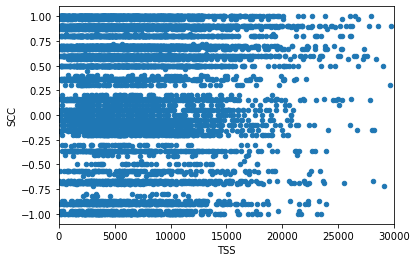

In [5]:

ax= values.plot.scatter(x='TSS',y= 'SCC')
plt.xlim (0,30000)
plt.show()